# Basic preparations

In this Notebook, the geofabric for the "Greater St. Mary and Milk area", shared between Canada and US, is extracted from the `MERIT-Basins` dataset.

In [1]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import hydrant.topology.geom as gm

import subprocess
import os
import glob

Path definitions (system dependant - modify accordingly):

In [2]:
# geofabric paths
## merit-basins provided in `rrg-mclark`
mb_path = '/project/rrg-mclark/data/geospatial-data/MERIT-Basins/MERIT_Hydro_v07_Basins_v01_bugfix1/pfaf_level_02/'
nc_path = '/project/rrg-mclark/data/geospatial-data/MERIT-Basins/MERIT_Hydro_v07_Basins_v01_bugfix1/coastal_hillslopes'
## basin boundaries - what ECCC has provided
bs_path = '../../../../geofabric/eccc-smm/greater_smm_eccc.shp'

# output paths
mb_out = './greater_smm_geofabric/'

# Reading Geofabric Dataset

## Greater SMM boundaries

In [3]:
gsmm = pd.concat([gpd.read_file(f).to_crs(epsg=4326) for f in glob.glob(bs_path)])

<AxesSubplot:>

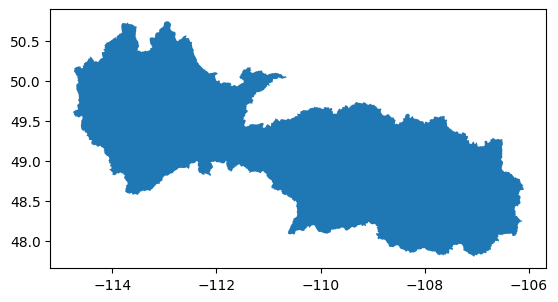

In [4]:
gsmm.plot()

## MERIT-Basins layers

Upon **visual** inspection, layers #71 and #74 has sub-basins and river branches inside the boundary of the Assiniboine River Basin!

In [5]:
# file names
# catchments (subbasin)
cat_files = [
    'cat_pfaf_71_MERIT_Hydro_v07_Basins_v01_bugfix1.shp',
    'cat_pfaf_74_MERIT_Hydro_v07_Basins_v01_bugfix1.shp'
]
# rivers (river segments)
riv_files = [
    'riv_pfaf_71_MERIT_Hydro_v07_Basins_v01_bugfix1.shp',
    'riv_pfaf_74_MERIT_Hydro_v07_Basins_v01_bugfix1.shp'
]
# non-contributing catchments (those without any river segments defined for them)
nca_files = [
    'hillslope_71_clean.shp',
    'hillslope_74_clean.shp'
]

# reading in data
cat = pd.concat([gpd.read_file(os.path.join(mb_path, f)) for f in cat_files])
riv = pd.concat([gpd.read_file(os.path.join(mb_path, f)) for f in riv_files])
nca = pd.concat([gpd.read_file(os.path.join(nc_path, f)) for f in nca_files])

In [6]:
# MERIT-Basins has an epsg=4326, but is not explicitely defined
# We explicitely define it for our layers!
cat.set_crs(epsg=4326, inplace=True)
nca.set_crs(epsg=4326, inplace=True)
riv.set_crs(epsg=4326, inplace=True)

,COMID,lengthkm,lengthdir,sinuosity,slope,uparea,order,strmDrop_t,slope_taud,NextDownID,maxup,up1,up2,up3,up4,geometry
0,71000001,7.020492,4.158236,1.688334,0.000570,391.901537,2,0.0,0.000000,71000065,2,71000095,71000213,0,0,"LINESTRING (-98.06167 60.00000, -98.06250 59.9..."
1,71000002,24.171249,15.709184,1.538670,0.000058,701.754912,2,1.4,0.000058,71000065,2,71000003,71000014,0,0,"LINESTRING (-98.06167 60.00000, -98.06083 60.0..."
2,71000003,14.760464,11.209022,1.316838,0.000770,480.760660,2,11.4,0.000770,71000002,2,71000004,71000011,0,0,"LINESTRING (-98.17250 60.13000, -98.17333 60.1..."
3,71000004,6.240078,4.631999,1.347168,0.000911,388.938962,2,5.7,0.000911,71000003,2,71000005,71000015,0,0,"LINESTRING (-98.33500 60.07000, -98.33583 60.0..."
4,71000005,4.462477,3.338111,1.336827,0.000670,328.557527,2,3.0,0.000670,71000004,2,71000006,71000012,0,0,"LINESTRING (-98.39917 60.09667, -98.40000 60.0..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72654,74072655,5.249406,3.933179,1.334647,0.000190,54.191161,1,0.0,0.000000,74072596,0,0,0,0,0,"LINESTRING (-90.39667 29.45417, -90.39667 29.4..."
72655,74072656,10.390038,5.539318,1.875689,0.000077,66.319408,1,0.8,0.000077,74072598,0,0,0,0,0,"LINESTRING (-90.43750 29.46083, -90.43833 29.4..."
72656,74072657,15.714168,8.923830,1.760922,0.000083,89.700376,1,1.3,0.000083,74072611,0,0,0,0,0,"LINESTRING (-90.82000 29.42000, -90.81917 29.4..."
72657,74072658,21.661237,14.363585,1.508066,0.000046,153.250964,1,0.0,0.000000,74072607,0,0,0,0,0,"LINESTRING (-90.62500 29.36083, -90.62500 29.3..."


# Preparing `cat`, `riv`, and `nca` objects for ARB

## Preparing `catchments` and `rivers` from `MERIT-Basins`

In [7]:
catchments = gm.prepare_cat(
    cat=cat,
    cat_col_id='COMID',
    cst=nca,
    cst_col_mapper={'FID':'COMID'},
    cst_col_id='COMID'
)

In [8]:
catchments

,COMID,unitarea,geometry,hillslope
0,71000001,39.620826,"POLYGON ((-98.14542 60.06375, -98.13792 60.063...",0
1,71000002,99.276774,"MULTIPOLYGON (((-98.11958 60.19292, -98.11458 ...",0
2,71000003,63.957629,"MULTIPOLYGON (((-98.33375 60.03542, -98.33292 ...",0
3,71000004,16.746171,"MULTIPOLYGON (((-98.40125 60.05208, -98.40042 ...",0
4,71000005,5.993164,"POLYGON ((-98.43208 60.10708, -98.43125 60.107...",0
...,...,...,...,...
125292,74076342,0.007453,"POLYGON ((-92.81708 29.65292, -92.81708 29.653...",1
125293,74076343,0.007451,"POLYGON ((-92.87375 29.67625, -92.87375 29.677...",1
125294,74076344,0.007445,"POLYGON ((-93.34542 29.76125, -93.34542 29.762...",1
125295,74076345,0.007448,"POLYGON ((-93.01208 29.72375, -93.01125 29.723...",1


In [9]:
rivers = gm.prepare_riv(
    riv=riv,
    riv_cols={
        'id':'COMID',
        'next_id':'NextDownID',
        'slope':'slope',
        'length':'lengthkm',
        'length_direct':'lengthdir'
    },
    cat=catchments,
    cat_cols={
        'id':'COMID',
        'hillslope':'hillslope',
        'geom':'geometry'
    }
)

In [10]:
rivers

,COMID,lengthkm,lengthdir,sinuosity,slope,uparea,order,strmDrop_t,slope_taud,NextDownID,maxup,up1,up2,up3,up4,geometry,hillslope
0,71000001,7.020492,4.158236,1.688334,0.000570,391.901537,2,0.0,0.000000,71000065,2,71000095,71000213,0,0,"LINESTRING (-98.06167 60.00000, -98.06250 59.9...",0
1,71000002,24.171249,15.709184,1.538670,0.000058,701.754912,2,1.4,0.000058,71000065,2,71000003,71000014,0,0,"LINESTRING (-98.06167 60.00000, -98.06083 60.0...",0
2,71000003,14.760464,11.209022,1.316838,0.000770,480.760660,2,11.4,0.000770,71000002,2,71000004,71000011,0,0,"LINESTRING (-98.17250 60.13000, -98.17333 60.1...",0
3,71000004,6.240078,4.631999,1.347168,0.000911,388.938962,2,5.7,0.000911,71000003,2,71000005,71000015,0,0,"LINESTRING (-98.33500 60.07000, -98.33583 60.0...",0
4,71000005,4.462477,3.338111,1.336827,0.000670,328.557527,2,3.0,0.000670,71000004,2,71000006,71000012,0,0,"LINESTRING (-98.39917 60.09667, -98.40000 60.0...",0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125292,74076342,1.000000,1.000000,1.000000,1.000000,1.000000,1,1.0,1.000000,-9999,1,1,1,1,1,None,1
125293,74076343,1.000000,1.000000,1.000000,1.000000,1.000000,1,1.0,1.000000,-9999,1,1,1,1,1,None,1
125294,74076344,1.000000,1.000000,1.000000,1.000000,1.000000,1,1.0,1.000000,-9999,1,1,1,1,1,None,1
125295,74076345,1.000000,1.000000,1.000000,1.000000,1.000000,1,1.0,1.000000,-9999,1,1,1,1,1,None,1


<AxesSubplot:>

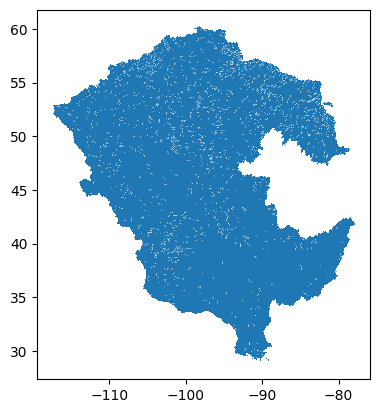

In [11]:
cat.plot()

## Subsetting GSMM portion

In [12]:
gsmm_catchments, gsmm_rivers = gm.intersect_topology(
    cat=catchments,
    cat_cols={
        'id':'COMID'
    },
    riv=rivers,
    riv_cols={
        'id':'COMID',
        'next_id':'NextDownID'
    },
    shapefile=gsmm)

In [13]:
gsmm_catchments

,COMID,unitarea,geometry,hillslope
33567,71033568,52.826971,"POLYGON ((-110.69792 50.12042, -110.69708 50.1...",0
33568,71033569,85.455494,"MULTIPOLYGON (((-110.86708 50.10542, -110.8645...",0
33569,71033570,8.440731,"MULTIPOLYGON (((-110.88708 50.03792, -110.8862...",0
33572,71033573,35.143691,"MULTIPOLYGON (((-110.90125 50.05708, -110.9004...",0
33577,71033578,107.075251,"MULTIPOLYGON (((-111.10875 50.11458, -111.1062...",0
...,...,...,...,...
53283,74004333,28.859685,"POLYGON ((-109.54458 49.10125, -109.54125 49.1...",0
53284,74004334,75.782736,"POLYGON ((-107.41625 49.03208, -107.41042 49.0...",0
53285,74004335,124.766904,"POLYGON ((-109.94958 49.04792, -109.94708 49.0...",0
53286,74004336,31.211695,"POLYGON ((-109.98708 49.06292, -109.98125 49.0...",0


## Plotting!

<AxesSubplot:>

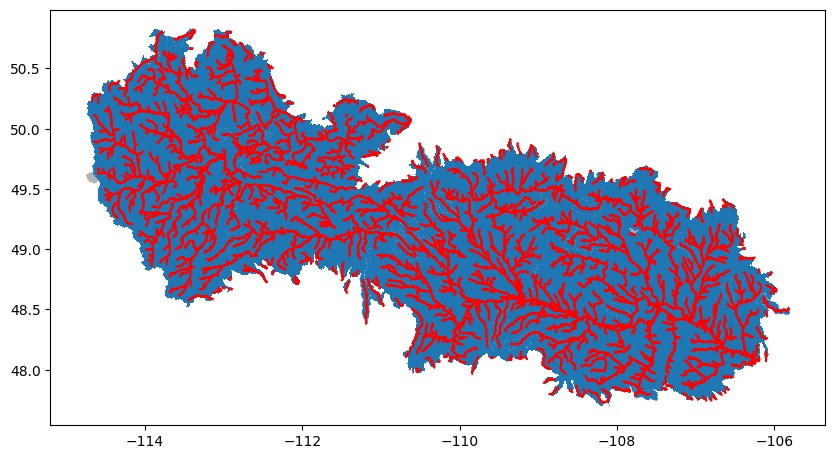

In [14]:
ax = gsmm.plot(color='black', alpha=0.3, figsize=(10, 20))
gsmm_rivers.plot(ax=ax, color='red')
gsmm_catchments.plot(ax=ax)

## Saving data

In [15]:
# saving data
gsmm_catchments.to_file(os.path.join(mb_out, 'gsmm_catchments.shp'))
gsmm_rivers.to_file(os.path.join(mb_out, 'gsmm_rivers.shp'))

___